In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set_theme(style="ticks", palette=sns.color_palette("Set2"))

In [2]:
# Specifying the directories and paths
working_folder = "."

figures_folder = working_folder + os.path.sep + 'figures' + os.path.sep
if not os.path.isdir(figures_folder):
    os.mkdir(figures_folder)
    
data_folder = working_folder + os.path.sep + 'data' + os.path.sep # ./data/


#'./data/asos_digital_experiments_dataset.parquet'
abtest_metrics_local_path = data_folder + 'asos_digital_experiments_dataset.parquet' 
abtest_metrics_remote_path = "https://osf.io/62t7f/download" 

# Download the dataset if it does not already exist
# The body of the if-statement is a shell command
if not os.path.exists(abtest_metrics_local_path):
    !wget -O $abtest_metrics_local_path $abtest_metrics_remote_path

# Load the dataset
abtest_metrics_df = pd.read_parquet(abtest_metrics_local_path)

In [3]:
abtest_metrics_df

,experiment_id,variant_id,metric_id,time_since_start,count_c,count_t,mean_c,mean_t,variance_c,variance_t
0,036afc,2,1,1.5,188065.0,186686.0,0.107808,0.107828,0.096186,0.096201
1,036afc,2,1,2.0,245041.0,243694.0,0.131790,0.131435,0.114422,0.114160
2,036afc,2,1,2.5,277237.0,275949.0,0.143065,0.142711,0.122598,0.122345
3,036afc,2,1,3.0,315689.0,314676.0,0.161789,0.160997,0.135613,0.135077
4,036afc,2,1,3.5,338631.0,337715.0,0.172474,0.171067,0.142727,0.141803
...,...,...,...,...,...,...,...,...,...,...
24148,fdaf62,1,4,28.0,2182559.0,2180705.0,38.270483,38.858464,8478.894092,8708.839083
24149,fdaf62,1,4,29.0,2259937.0,2257899.0,38.485748,39.065107,8627.264583,8821.982824
24150,fdaf62,1,4,30.0,2341537.0,2339309.0,38.691410,39.211843,8916.435308,8848.559719
24151,fdaf62,1,4,31.0,2422152.0,2419745.0,38.705264,39.263485,8836.078773,8884.955277


In [4]:
abtest_metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24153 entries, 0 to 24152
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   experiment_id     24153 non-null  object 
 1   variant_id        24153 non-null  int64  
 2   metric_id         24153 non-null  int64  
 3   time_since_start  24153 non-null  float64
 4   count_c           24153 non-null  float64
 5   count_t           24153 non-null  float64
 6   mean_c            24153 non-null  float64
 7   mean_t            24153 non-null  float64
 8   variance_c        23375 non-null  float64
 9   variance_t        23374 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 1.8+ MB


In [5]:
abtest_metrics_df.groupby(['experiment_id']).agg('time_since_start').mean().sort_values(ascending=False)


experiment_id
cf1b96    91.500000
6f8a33    91.061644
2c8a04    68.252033
3b62b9    61.784483
81761c    60.784483
            ...    
eeefa3     7.250000
591c2c     7.000000
b2da2e     2.500000
a1e2bf     1.750000
84f653     1.500000
Name: time_since_start, Length: 78, dtype: float64

In [55]:
df_cf1 = abtest_metrics_df.loc[(abtest_metrics_df['experiment_id'] == 'cf1b96') & (abtest_metrics_df['metric_id'] == 1)].reset_index()

In [56]:
df_cf1

,index,experiment_id,variant_id,metric_id,time_since_start,count_c,count_t,mean_c,mean_t,variance_c,variance_t
0,18941,cf1b96,1,1,88.5,2682484.0,2680930.0,0.335375,0.335491,0.222899,0.222937
1,18942,cf1b96,1,1,89.5,2686484.0,2685011.0,0.336715,0.336832,0.223338,0.223376
2,18943,cf1b96,1,1,90.5,2691092.0,2689690.0,0.338479,0.338534,0.223911,0.223929
3,18944,cf1b96,1,1,91.5,2694599.0,2693398.0,0.339938,0.340017,0.224380,0.224406
4,18945,cf1b96,1,1,92.5,2696653.0,2695632.0,0.341266,0.341327,0.224804,0.224823
5,18946,cf1b96,1,1,93.5,2696706.0,2695706.0,0.342779,0.342870,0.225282,0.225310
6,18947,cf1b96,1,1,94.5,2696764.0,2695777.0,0.344429,0.344545,0.225798,0.225834


In [75]:
from scipy.stats import ttest_ind_from_stats


df = abtest_metrics_df.copy()

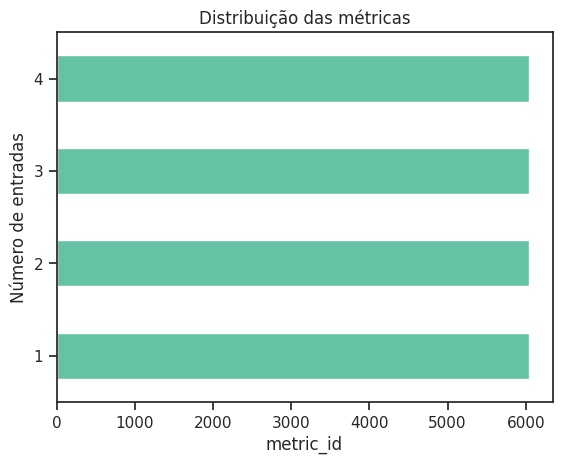

In [77]:
# Etapa 3: Exploração inicial
df["metric_id"].value_counts().sort_index().plot["experiment_id"].unique()[3](kind="barh")
plt.title("Distribuição das métricas")
plt.xlabel("metric_id")
plt.ylabel("Número de entradas")
plt.show()

In [88]:
df["experiment_id"].value_counts(ascending=False)

experiment_id
54a85a    1152
2c8a04     984
81761c     928
b382c6     848
329386     792
          ... 
591c2c      48
b2da2e      32
cf1b96      28
a1e2bf      16
84f653       8
Name: count, Length: 78, dtype: int64

In [89]:
exp_id = '81761c'
sub_df = df[(df["experiment_id"] == exp_id) & (df["metric_id"] == 1)]

In [90]:
# Ordenar por tempo
df_ord = sub_df.sort_values("time_since_start")

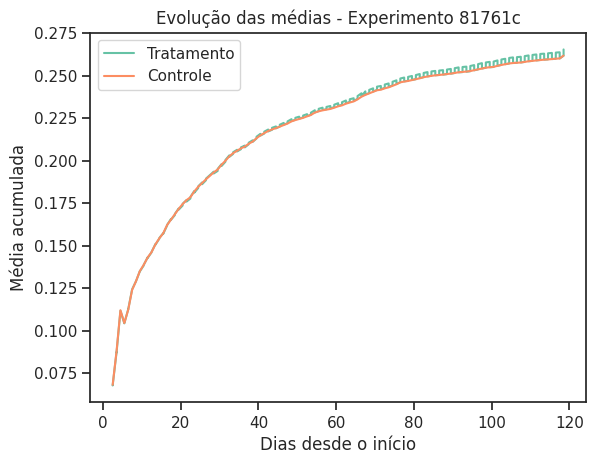

In [91]:
# Plotar evolução da média
plt.plot(df_ord["time_since_start"], df_ord["mean_t"], label="Tratamento")
plt.plot(df_ord["time_since_start"], df_ord["mean_c"], label="Controle")
plt.xlabel("Dias desde o início")
plt.ylabel("Média acumulada")
plt.title(f"Evolução das médias - Experimento {exp_id}")
plt.legend()
plt.show()


In [99]:
last = df_ord.iloc[-1]
res = ttest_ind_from_stats(
    mean1=last['mean_t'], std1=np.sqrt(last['variance_t']), nobs1=last["count_t"],
    mean2=last['mean_c'], std2=np.sqrt(last['variance_c']), nobs2=last["count_c"],
    equal_var= False
    
)

print('Teste T no ultimo dia de experimento')
print('p-valor: ', res.pvalue)
print('Estatistica T: ', res.statistic)

Teste T no ultimo dia de experimento
p-valor:  1.9006566348312876e-26
Estatistica T:  10.642098310792596


In [ ]:
# Etapa 6: Evolução do p-valor ao longo do tempo
p_values = []
for _, row in df_ord.iterrows():
    try:
        p = ttest_ind_from_stats(
            mean1=row["mean_t"], std1=np.sqrt(row["variance_t"]), nobs1=row["count_t"],
            mean2=row["mean_c"], std2=np.sqrt(row["variance_c"]), nobs2=row["count_c"],
            equal_var=False
        ).pvalue
        p_values.append(p)
    except:
        p_values.append(np.nan)

plt.plot(df_ord["time_since_start"], p_values, marker="o")
plt.axhline(0.05, color="red", linestyle="--", label="Nível de significância")
plt.xlabel("Dias")
plt.ylabel("p-valor")
plt.title("Evolução do p-valor ao longo do tempo")
plt.legend()
plt.show()

## 2

In [101]:
# 2. Escolher um experimento com metric_id = 1 (métrica binária)
binaria = df[df.metric_id == 1]
experimento_id = binaria.experiment_id.unique()[0]
sub = binaria[binaria.experiment_id == experimento_id].sort_values("time_since_start")

### 3. Definindo as hipóteses
"""
H0: A taxa de conversão do tratamento é igual à do controle
H1: A taxa de conversão do tratamento é diferente da do controle
Usaremos um teste z para proporções com base em médias e variâncias agregadas.
"""


In [104]:
# 4. Observar o último dia do experimento (mais dados acumulados)
linha = sub.iloc[-1]
# Extrair estatísticas
mean_c = linha['mean_c']
mean_t = linha['mean_t']
var_c = linha['variance_c']
var_t = linha['variance_t']
n_c = linha['count_c']
n_t = linha['count_t']



In [106]:
# 5. Cálculo do erro padrão e estatística Z
se = np.sqrt((var_c / n_c) + (var_t / n_t))
z = (mean_t - mean_c) / se
p = 2 * (1 - norm.cdf(abs(z)))
print(f"Taxa de conversão controle: {mean_c:.4f}")
print(f"Taxa de conversão tratamento: {mean_t:.4f}")
print(f"Erro padrão: {se:.6f}")
print(f"Estatística Z: {z:.4f}")
print(f"p-valor: {p:.5f}")


Taxa de conversão controle: 0.5868
Taxa de conversão tratamento: 0.5873
Erro padrão: 0.000679
Estatística Z: 0.7458
p-valor: 0.45582


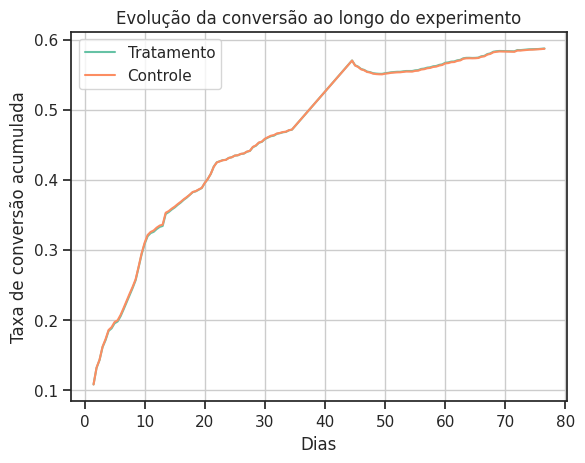

In [107]:
# 6. Visualização das médias ao longo do tempo
plt.plot(sub["time_since_start"], sub["mean_t"], label="Tratamento")
plt.plot(sub["time_since_start"], sub["mean_c"], label="Controle")
plt.xlabel("Dias")
plt.ylabel("Taxa de conversão acumulada")
plt.title("Evolução da conversão ao longo do experimento")
plt.legend()
plt.grid()
plt.show()
